# Telecom Churn Assignment

In this assignment we are using User-based Churn model for predicting Churn for high value customers. This assignment has business objective of predicting Churn in the last month(ninth month) using the data of first three months.

In [87]:
# Downloading and importing the dataset from the link 
# https://drive.google.com/uc?authuser=0&id=1SWnADIda31mVFevFcfkGtcgBHTKKI94J&export=download
# importing libraries to download the dataset and read in this environment 
# as this a drive link (REST API link) will not use of BeautifulSoup4 and requests 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# we will directly read in a Pandas DataFrame (we may have to wait for sometime as file get doenloaded)
# sign for completion is small circle on top right besides "Python3" when the grey fill is gone
# please change the path based on your login as it is different for everyone
data = pd.read_csv('https://drive.google.com/uc?authuser=0&id=1SWnADIda31mVFevFcfkGtcgBHTKKI94J&export=download')

## Understanding the Dataset by looking at size and definitions

In [3]:
# gettiing a snapshot of first few rows to undersatnd the dataset
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# data size no of rows and columns
print(data.shape)
# listing column names to understand 
print((data.columns.values), sep = '\n')

(99999, 226)
['mobile_number' 'circle_id' 'loc_og_t2o_mou' 'std_og_t2o_mou'
 'loc_ic_t2o_mou' 'last_date_of_month_6' 'last_date_of_month_7'
 'last_date_of_month_8' 'last_date_of_month_9' 'arpu_6' 'arpu_7' 'arpu_8'
 'arpu_9' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'onnet_mou_9'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'offnet_mou_9'
 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_ic_mou_9'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'roam_og_mou_9'
 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2t_mou_9' 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7'
 'loc_og_t2m_mou_8' 'loc_og_t2m_mou_9' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2f_mou_9'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8'
 'loc_og_t2c_mou_9' 'loc_og_mou_6' 'loc_og_mou_7' 'loc_og_mou_8'
 'loc_og_mou_9' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2t_mou_9' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2m_mou_9' 'std

In [5]:
# downloading and importing the data dictionary
data_dict = pd.read_excel('https://cdn.upgrad.com/UpGrad/temp/a625d1ee-b8d7-4edb-bdde-b1d82beaf5b4/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx', 
                   sheet_name='Sheet1')

In [6]:
print(data_dict)

     Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network 

## Data Cleaning

In [7]:
# looking at no of circles
print(data['circle_id'].unique())
# all the data is from a single telecom circle i.e. Circle_id 109

[109]


In [8]:
# removing Circle_ID from the dataset/DataFrame as entire data belongs to single circle 109
data = data.drop('circle_id', axis = 1)

In [9]:
# checking duplicate data based on mobile no 
len(data['mobile_number'].unique())
# the result depicts the unique no matching to dataFrame no of rows implying that no duplicate records in DF

99999

In [10]:
# Fixing Date Values (transposing to see more data)
data.filter(like = "date", axis =1).transpose()
data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6'])
data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_7'])
data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_8'])
data['date_of_last_rech_9'] = pd.to_datetime(data['date_of_last_rech_9'])
data['last_date_of_month_6'] = pd.to_datetime(data['last_date_of_month_6'])
data['last_date_of_month_7'] = pd.to_datetime(data['last_date_of_month_7'])
data['last_date_of_month_8'] = pd.to_datetime(data['last_date_of_month_8'])
data['last_date_of_month_9'] = pd.to_datetime(data['last_date_of_month_9'])
data['churn_date_bm']= pd.to_datetime('2014-08-31') # last day of previous month

In [12]:
# viewing fixed Dates
data.filter(like = "date", axis =1).transpose()

,0,1,2,3,4,5,6,7,8,9,...,99989,99990,99991,99992,99993,99994,99995,99996,99997,99998
last_date_of_month_6,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,...,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00
last_date_of_month_7,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,...,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,NaT,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00
last_date_of_month_8,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,...,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00
last_date_of_month_9,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,...,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,NaT,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00
date_of_last_rech_6,2014-06-21 00:00:00,2014-06-29 00:00:00,2014-06-17 00:00:00,2014-06-28 00:00:00,2014-06-26 00:00:00,2014-06-19 00:00:00,2014-06-28 00:00:00,2014-06-27 00:00:00,2014-06-25 00:00:00,2014-06-29 00:00:00,...,2014-06-27 00:00:00,2014-06-11 00:00:00,2014-06-27 00:00:00,2014-06-27 00:00:00,NaT,2014-06-03 00:00:00,2014-06-17 00:00:00,2014-06-13 00:00:00,2014-06-17 00:00:00,2014-06-16 00:00:00
date_of_last_rech_7,2014-07-16 00:00:00,2014-07-31 00:00:00,2014-07-24 00:00:00,2014-07-31 00:00:00,2014-07-28 00:00:00,2014-07-17 00:00:00,2014-07-31 00:00:00,2014-07-25 00:00:00,2014-07-31 00:00:00,2014-07-23 00:00:00,...,2014-07-07 00:00:00,2014-07-29 00:00:00,2014-07-31 00:00:00,2014-07-30 00:00:00,NaT,2014-07-20 00:00:00,2014-07-17 00:00:00,2014-07-26 00:00:00,2014-07-19 00:00:00,NaT
date_of_last_rech_8,2014-08-08 00:00:00,2014-08-28 00:00:00,2014-08-14 00:00:00,2014-08-31 00:00:00,2014-08-09 00:00:00,2014-08-24 00:00:00,2014-08-28 00:00:00,2014-08-26 00:00:00,2014-08-30 00:00:00,2014-08-29 00:00:00,...,2014-08-25 00:00:00,2014-08-24 00:00:00,2014-08-25 00:00:00,2014-08-30 00:00:00,2014-08-08 00:00:00,2014-08-26 00:00:00,2014-08-24 00:00:00,NaT,2014-08-20 00:00:00,NaT
date_of_last_rech_9,2014-09-28 00:00:00,2014-09-30 00:00:00,2014-09-29 00:00:00,2014-09-30 00:00:00,2014-09-28 00:00:00,2014-09-28 00:00:00,2014-09-28 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-20 00:00:00,...,2014-09-23 00:00:00,2014-09-30 00:00:00,2014-09-28 00:00:00,2014-09-30 00:00:00,NaT,2014-09-25 00:00:00,2014-09-26 00:00:00,2014-09-02 00:00:00,2014-09-17 00:00:00,NaT
date_of_last_rech_data_6,6/21/2014,NaN,NaN,NaN,6/4/2014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/13/2014,6/17/2014,6/11/2014
date_of_last_rech_data_7,7/16/2014,7/25/2014,NaN,NaN,NaN,NaN,NaN,NaN,7/31/2014,7/23/2014,...,NaN,7/29/2014,NaN,NaN,NaN,NaN,NaN,NaN,7/19/2014,NaN


In [13]:
# converting Mobile numbers to categorical value
data.mobile_number = data.mobile_number.astype(str)

In [14]:
# looking at the data(transposing it to fit more columns)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loc_og_t2o_mou,98981.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,98981.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,98981.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,99999.0,282.987358,328.439770,-2258.709,93.4115,197.704,371.0600,27731.088
arpu_7,99999.0,278.536648,338.156291,-2014.045,86.9805,191.640,365.3445,35145.834
arpu_8,99999.0,279.154731,344.474791,-945.808,84.1260,192.080,369.3705,33543.624
arpu_9,99999.0,261.645069,341.998630,-1899.505,62.6850,176.849,353.4665,38805.617
onnet_mou_6,96062.0,132.395875,297.207406,0.000,7.3800,34.310,118.7400,7376.710
onnet_mou_7,96140.0,133.670805,308.794148,0.000,6.6600,32.330,115.5950,8157.780
onnet_mou_8,94621.0,133.018098,308.951589,0.000,6.4600,32.360,115.8600,10752.560


In [15]:
# computing Null Values 
data.isnull().sum()

mobile_number               0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
loc_og_t2t_mou_7         3859
                        ...  
night_pck_user_6        74846
night_pck_user_7        74428
night_pck_

In [16]:
# looking at % of missing values 
Missing = round(100*(data.isnull().sum()/len(data.index)),2)
print(Missing)

mobile_number            0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
                        ...  
night_pck_user_6        74.85
night_pck_user_7        74.43
night_pck_

In [17]:
# looking just at the columns which have just missing values (excluding the Columns which don't have missing data)
Missing[Missing>0]

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
loc_og_t2m_mou_6         3.94
loc_og_t2m_mou_7         3.86
loc_og_t2m_mou_8         5.38
loc_og_t2m_mou_9         7.75
                        ...  
max_rech_data_8         73.66
max_rech_data_9         74.08
count_rech

In [18]:
# looking just at the columns which have more than 25% missing values 
# (excluding the Columns which don't have missing data)
Missing[Missing>25]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [19]:
# Since the variable having more than 70% missing data will not aid in our churn prediction therefore we will remove these 
Remove = Missing[Missing>70]
remove_colnames = list(Remove.index.values)

In [20]:
# creating a new dataframe after removing column names which have >70% misssing values
# First we will cull out column names 
cols_keep = list(set(list(data.columns.values))-set(remove_colnames))
new_data = data[cols_keep]
type(new_data)

pandas.core.frame.DataFrame

In [21]:
# viewing the new dataframe
new_data.describe()

,std_ic_t2o_mou_6,total_ic_mou_6,loc_og_t2t_mou_6,roam_og_mou_9,std_og_t2o_mou,std_og_t2f_mou_6,spl_ic_mou_9,isd_ic_mou_9,loc_og_t2t_mou_9,loc_og_mou_9,...,total_ic_mou_8,monthly_2g_8,loc_ic_t2m_mou_6,sachet_2g_9,total_og_mou_8,og_others_6,std_ic_t2m_mou_8,total_rech_amt_6,spl_og_mou_9,roam_ic_mou_7
count,96062.0,99999.000000,96062.000000,92254.000000,98981.0,96062.000000,92254.000000,92254.000000,92254.000000,92254.000000,...,99999.000000,99999.000000,96062.000000,99999.000000,99999.000000,96062.000000,94621.000000,99999.000000,92254.000000,96140.000000
mean,0.0,200.130037,47.100763,8.555519,0.0,1.129011,0.163137,8.063003,44.584446,138.709970,...,198.750783,0.081001,107.475650,0.393104,304.119513,0.454157,21.183211,327.514615,4.412767,7.149898
std,0.0,291.651671,150.856393,58.438186,0.0,7.984970,0.527860,63.505379,147.995390,245.934517,...,289.321094,0.299568,171.713903,1.347140,478.150031,4.125911,83.683565,398.019701,16.328227,73.447948
min,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,38.530000,1.660000,0.000000,0.0,0.000000,0.000000,0.000000,1.360000,15.560000,...,38.290000,0.000000,17.290000,0.000000,38.580000,0.000000,0.000000,109.000000,0.000000,0.000000
50%,0.0,114.740000,11.910000,0.000000,0.0,0.000000,0.000000,0.000000,11.260000,61.840000,...,114.660000,0.000000,56.490000,0.000000,138.610000,0.000000,2.030000,230.000000,0.000000,0.000000
75%,0.0,251.670000,40.960000,0.000000,0.0,0.000000,0.060000,0.000000,39.280000,162.225000,...,248.990000,0.000000,132.387500,0.000000,369.900000,0.000000,15.360000,437.500000,3.230000,0.000000
max,0.0,7716.140000,6431.330000,4428.460000,0.0,628.560000,62.380000,5057.740000,10389.240000,11099.260000,...,10830.380000,5.000000,4693.860000,40.000000,14043.060000,800.890000,5645.860000,35190.000000,1635.710000,15371.040000


In [22]:
# Shape
new_data.shape

(99999, 186)

In [23]:
#viewing the existing null values
Missing_new = new_data.isnull().sum()
print(Missing_new)

std_ic_t2o_mou_6        3937
total_ic_mou_6             0
loc_og_t2t_mou_6        3937
roam_og_mou_9           7745
std_og_t2o_mou          1018
std_og_t2f_mou_6        3937
spl_ic_mou_9            7745
isd_ic_mou_9            7745
loc_og_t2t_mou_9        7745
loc_og_mou_9            7745
std_ic_t2f_mou_6        3937
arpu_8                     0
arpu_9                     0
vol_2g_mb_7                0
loc_ic_t2o_mou          1018
loc_og_mou_8            5378
loc_og_mou_7            3859
isd_ic_mou_7            3859
std_og_t2t_mou_6        3937
isd_ic_mou_8            5378
sachet_2g_8                0
std_ic_t2m_mou_7        3859
max_rech_amt_6             0
vol_2g_mb_9                0
monthly_3g_7               0
total_ic_mou_7             0
sachet_3g_8                0
loc_ic_t2f_mou_9        7745
loc_og_t2t_mou_7        3859
std_og_t2f_mou_7        3859
                        ... 
total_rech_num_8           0
loc_ic_mou_7            3859
total_rech_num_7           0
std_ic_mou_9  

In [24]:
# checking row - wise missing data
row_missing = new_data.isnull().sum(axis = 1)
print(row_missing)

0         87
1          0
2          0
3          0
4          0
5          0
6          0
7         29
8          0
9          0
10        29
11         1
12         0
13         0
14         0
15        29
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26        30
27         0
28         0
29        29
        ... 
99969      0
99970      0
99971      0
99972      0
99973      1
99974      0
99975      0
99976      0
99977      0
99978    122
99979      0
99980      0
99981      1
99982      0
99983     59
99984      0
99985      1
99986      0
99987      0
99988      0
99989      0
99990      0
99991      0
99992      0
99993    124
99994      0
99995      0
99996     88
99997      0
99998     90
Length: 99999, dtype: int64


In [25]:
# inspecting missing data in row higher than 70 shows that they do have ARPU data and they cannot be removed
row_missing[row_missing>70]
new_data[(row_missing)>70].shape

(2474, 186)

In [26]:
# also these rows are are just 11.62%
new_data[(row_missing)>70].shape[0]/new_data.shape[0]*100

2.4740247402474025

In [27]:
# checking the ARPU revenue before removing the rows
arpu_new_data = new_data.filter(like = "arpu_", axis = 1)
arpu_row_missing = new_data[(row_missing)>70].filter(like = "arpu_", axis = 1)
arpu_row_missing.sum()/arpu_new_data.sum()*100

arpu_8    0.685801
arpu_9    0.456774
arpu_7    0.723182
arpu_6    2.111255
dtype: float64

In [28]:
# as the data having more than 5 nulls in a row is just 11% by data count and just 2.1% (at max)
# by value we proceed with removing them
# still after removing we will be left with decent data size to work with
final_data = new_data[(row_missing)<=70]

In [29]:
# checking Shape of final_data
final_data.shape

(97525, 186)

In [30]:
# replacing row nulls by zero
final_data = final_data.fillna(0)

In [31]:
# looking at first 10 rows of final_Data
final_data.head(10)

,std_ic_t2o_mou_6,total_ic_mou_6,loc_og_t2t_mou_6,roam_og_mou_9,std_og_t2o_mou,std_og_t2f_mou_6,spl_ic_mou_9,isd_ic_mou_9,loc_og_t2t_mou_9,loc_og_mou_9,...,total_ic_mou_8,monthly_2g_8,loc_ic_t2m_mou_6,sachet_2g_9,total_og_mou_8,og_others_6,std_ic_t2m_mou_8,total_rech_amt_6,spl_og_mou_9,roam_ic_mou_7
1,0.0,26.83,23.88,0.00,0.0,0.00,0.00,0.00,18.34,72.11,...,423.28,0,17.48,0,312.44,0.00,12.49,74,0.00,0.00
2,0.0,370.04,7.19,70.94,0.0,1.48,0.45,0.01,14.39,64.81,...,395.03,0,14.38,1,285.46,0.45,167.09,168,42.08,0.00
3,0.0,280.08,73.68,0.00,0.0,0.00,0.55,0.00,15.49,83.03,...,53.13,0,113.96,0,352.21,0.00,4.94,230,43.29,54.86
4,0.0,216.44,50.31,0.00,0.0,0.00,0.18,0.00,58.78,98.61,...,338.81,0,106.84,0,208.16,0.00,0.00,196,5.98,0.00
5,0.0,155.39,50.16,0.00,0.0,2.88,0.53,0.00,138.79,185.71,...,157.13,0,49.19,0,99.94,0.00,0.00,120,0.00,0.00
6,0.0,2128.41,71.03,0.00,0.0,0.00,0.00,0.00,15.23,65.56,...,2167.11,0,248.64,0,168.74,0.00,2.60,499,0.00,0.00
7,0.0,626.46,51.39,0.00,0.0,6.66,0.00,0.00,0.00,0.00,...,428.74,0,217.56,0,350.16,0.00,141.33,1580,0.00,33.49
8,0.0,103.86,297.13,0.00,0.0,0.00,0.00,0.00,26.13,60.71,...,16.54,0,57.58,0,171.56,0.00,0.65,437,0.00,0.00
9,0.0,303.98,33.89,0.00,0.0,0.00,0.00,28.13,27.84,65.11,...,219.86,0,132.94,0,100.78,0.00,1.74,220,0.00,0.00
10,0.0,26.35,0.00,0.00,0.0,0.00,1.00,0.00,0.00,0.31,...,50.18,0,26.35,1,190.56,0.00,41.78,0,0.00,0.00


# creating derived features and further cleaning Data

In [32]:
final_data.columns.values

array(['std_ic_t2o_mou_6', 'total_ic_mou_6', 'loc_og_t2t_mou_6',
       'roam_og_mou_9', 'std_og_t2o_mou', 'std_og_t2f_mou_6',
       'spl_ic_mou_9', 'isd_ic_mou_9', 'loc_og_t2t_mou_9', 'loc_og_mou_9',
       'std_ic_t2f_mou_6', 'arpu_8', 'arpu_9', 'vol_2g_mb_7',
       'loc_ic_t2o_mou', 'loc_og_mou_8', 'loc_og_mou_7', 'isd_ic_mou_7',
       'std_og_t2t_mou_6', 'isd_ic_mou_8', 'sachet_2g_8',
       'std_ic_t2m_mou_7', 'max_rech_amt_6', 'vol_2g_mb_9',
       'monthly_3g_7', 'total_ic_mou_7', 'sachet_3g_8',
       'loc_ic_t2f_mou_9', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7',
       'max_rech_amt_8', 'sachet_3g_7', 'vol_3g_mb_7', 'ic_others_8',
       'arpu_7', 'offnet_mou_8', 'std_og_t2m_mou_9', 'std_og_mou_7',
       'ic_others_7', 'total_rech_amt_7', 'std_ic_t2o_mou_9',
       'date_of_last_rech_9', 'loc_og_t2m_mou_9', 'std_ic_t2t_mou_7',
       'std_ic_t2o_mou_8', 'roam_ic_mou_8', 'monthly_2g_6',
       'std_og_t2c_mou_8', 'date_of_last_rech_7', 'og_others_7',
       'loc_ic_t2m_mou_7',

In [33]:
# looking at the last recharge Value 
final_data.filter(like='total_rech', axis = 1)

,total_rech_amt_7,total_rech_amt_9,total_rech_amt_8,total_rech_num_6,total_rech_num_8,total_rech_num_7,total_rech_num_9,total_rech_amt_6
1,384,121,283,4,11,9,5,74
2,315,358,116,5,2,4,7,168
3,310,410,601,10,18,11,14,230
4,350,200,287,5,3,6,4,196
5,0,130,130,2,3,2,3,120
6,222,141,294,15,11,10,7,499
7,790,0,3638,5,7,5,3,1580
8,601,186,120,19,14,21,15,437
9,195,180,210,4,5,2,3,220
10,0,99,324,1,17,1,7,0


In [34]:
# creating a derived feature average recharge for first two months (6th and 7th)
final_data['avg_rech_67'] = (final_data['total_rech_amt_6'] + final_data['total_rech_amt_9'])/2.0
final_data.columns.values

array(['std_ic_t2o_mou_6', 'total_ic_mou_6', 'loc_og_t2t_mou_6',
       'roam_og_mou_9', 'std_og_t2o_mou', 'std_og_t2f_mou_6',
       'spl_ic_mou_9', 'isd_ic_mou_9', 'loc_og_t2t_mou_9', 'loc_og_mou_9',
       'std_ic_t2f_mou_6', 'arpu_8', 'arpu_9', 'vol_2g_mb_7',
       'loc_ic_t2o_mou', 'loc_og_mou_8', 'loc_og_mou_7', 'isd_ic_mou_7',
       'std_og_t2t_mou_6', 'isd_ic_mou_8', 'sachet_2g_8',
       'std_ic_t2m_mou_7', 'max_rech_amt_6', 'vol_2g_mb_9',
       'monthly_3g_7', 'total_ic_mou_7', 'sachet_3g_8',
       'loc_ic_t2f_mou_9', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7',
       'max_rech_amt_8', 'sachet_3g_7', 'vol_3g_mb_7', 'ic_others_8',
       'arpu_7', 'offnet_mou_8', 'std_og_t2m_mou_9', 'std_og_mou_7',
       'ic_others_7', 'total_rech_amt_7', 'std_ic_t2o_mou_9',
       'date_of_last_rech_9', 'loc_og_t2m_mou_9', 'std_ic_t2t_mou_7',
       'std_ic_t2o_mou_8', 'roam_ic_mou_8', 'monthly_2g_6',
       'std_og_t2c_mou_8', 'date_of_last_rech_7', 'og_others_7',
       'loc_ic_t2m_mou_7',

In [35]:
# finding 70th percentile to define high value customers data
seventy_per = final_data['avg_rech_67'].quantile(.7)
print(seventy_per)

364.5


In [36]:
# filtering high value Customers
final_data_hv = final_data.loc[(final_data['avg_rech_67']>=seventy_per)]
# shape of high_value data set
final_data_hv.shape

(29294, 187)

In [37]:
# defining churn date and creating derived column churn (where 1 = churn and 0 = no churn)
# churned customers (churn=1, else 0) based on the fourth month as follows: Those who have 
# not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

churn = ((final_data_hv['total_ic_mou_9'] == 0)&(final_data_hv['total_og_mou_9']==0)
                  &(final_data_hv['vol_2g_mb_9']==0)&(final_data_hv['vol_3g_mb_9']==0))
type(churn)

# appending Churn in high_value DataFrame
final_data_hv['churn'] = pd.Series(churn.astype(int), index=final_data_hv.index)
#final_data_hv['churn'] = pd.Series(churn.astype(int)).rename('churn')

/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [38]:
# looking at final dataset
final_data_hv.head()

,std_ic_t2o_mou_6,total_ic_mou_6,loc_og_t2t_mou_6,roam_og_mou_9,std_og_t2o_mou,std_og_t2f_mou_6,spl_ic_mou_9,isd_ic_mou_9,loc_og_t2t_mou_9,loc_og_mou_9,...,loc_ic_t2m_mou_6,sachet_2g_9,total_og_mou_8,og_others_6,std_ic_t2m_mou_8,total_rech_amt_6,spl_og_mou_9,roam_ic_mou_7,avg_rech_67,churn
7,0.0,626.46,51.39,0.00,0.0,6.66,0.0,0.00,0.00,0.00,...,217.56,0,350.16,0.00,141.33,1580,0.00,33.49,790.0,1
13,0.0,968.61,49.63,12.78,0.0,0.00,0.0,259.33,6.14,119.69,...,142.88,0,1015.26,0.00,317.91,507,0.00,144.24,430.0,0
16,0.0,364.86,42.61,0.00,0.0,0.00,0.0,0.00,26.88,233.04,...,226.81,0,233.38,0.00,73.93,570,0.00,2.83,395.0,0
17,0.0,91.88,38.99,17.98,0.0,0.00,0.0,0.00,36.41,45.79,...,47.41,0,0.00,0.93,0.00,816,2.64,4.76,575.5,0
21,0.0,207.09,4.48,0.00,0.0,0.00,0.0,0.00,29.98,137.53,...,118.23,0,1068.54,0.00,101.74,600,0.00,0.00,640.0,0


In [39]:
print(final_data_hv.columns.values,'/n')

['std_ic_t2o_mou_6' 'total_ic_mou_6' 'loc_og_t2t_mou_6' 'roam_og_mou_9'
 'std_og_t2o_mou' 'std_og_t2f_mou_6' 'spl_ic_mou_9' 'isd_ic_mou_9'
 'loc_og_t2t_mou_9' 'loc_og_mou_9' 'std_ic_t2f_mou_6' 'arpu_8' 'arpu_9'
 'vol_2g_mb_7' 'loc_ic_t2o_mou' 'loc_og_mou_8' 'loc_og_mou_7'
 'isd_ic_mou_7' 'std_og_t2t_mou_6' 'isd_ic_mou_8' 'sachet_2g_8'
 'std_ic_t2m_mou_7' 'max_rech_amt_6' 'vol_2g_mb_9' 'monthly_3g_7'
 'total_ic_mou_7' 'sachet_3g_8' 'loc_ic_t2f_mou_9' 'loc_og_t2t_mou_7'
 'std_og_t2f_mou_7' 'max_rech_amt_8' 'sachet_3g_7' 'vol_3g_mb_7'
 'ic_others_8' 'arpu_7' 'offnet_mou_8' 'std_og_t2m_mou_9' 'std_og_mou_7'
 'ic_others_7' 'total_rech_amt_7' 'std_ic_t2o_mou_9' 'date_of_last_rech_9'
 'loc_og_t2m_mou_9' 'std_ic_t2t_mou_7' 'std_ic_t2o_mou_8' 'roam_ic_mou_8'
 'monthly_2g_6' 'std_og_t2c_mou_8' 'date_of_last_rech_7' 'og_others_7'
 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8' 'isd_og_mou_7' 'isd_og_mou_9'
 'total_ic_mou_9' 'max_rech_amt_7' 'sachet_3g_6' 'std_og_t2m_mou_7'
 'loc_og_t2c_mou_9' 'std_og_t2t_

In [40]:
#creating a few more derived metrices (for three months leaving month 9 aside as that is the churn month)
final_data_hv['total_arpu'] = final_data_hv['arpu_6']+final_data_hv['arpu_7']+final_data_hv['arpu_8']
final_data_hv['total_rech_amt'] = final_data_hv['total_rech_amt_6']+final_data_hv['total_rech_amt_7']+final_data_hv['total_rech_amt_8']
final_data_hv['total_rech_num'] = final_data_hv['total_rech_num_6']+final_data_hv['total_rech_num_7']+final_data_hv['total_rech_num_8']
final_data_hv['totloc_in_minute'] = final_data_hv['loc_ic_mou_6']+final_data_hv['loc_ic_mou_7']+final_data_hv['loc_ic_mou_8']
final_data_hv['totstd_in_minute'] = final_data_hv['std_ic_mou_6']+final_data_hv['std_ic_mou_7']+final_data_hv['std_ic_mou_8']
final_data_hv['totloc_og_minute'] = final_data_hv['loc_og_mou_6']+final_data_hv['loc_og_mou_7']+final_data_hv['loc_og_mou_8']
final_data_hv['totstd_og_minute'] = final_data_hv['std_og_mou_6']+final_data_hv['std_og_mou_7']+final_data_hv['std_og_mou_8']
# caluculating no of days since last recharge
final_data_hv['last_rech_date'] = final_data_hv[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].replace(0, np.NaN).apply(max, axis=1)
final_data_hv['days_frm_last_rech'] = ((final_data_hv['last_rech_date'] - final_data_hv['churn_date_bm']).astype('timedelta64[D]'))

/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [41]:
#checking null values
final_data_hv.filter(like= "last_rech_date", axis = 1)[final_data_hv.filter(like= "last_rech_date", axis = 1).isnull()]

,last_rech_date
7,NaT
13,NaT
16,NaT
17,NaT
21,NaT
24,NaT
33,NaT
38,NaT
48,NaT
53,NaT


In [42]:
# removing Data Columns to normalise data and removing null values from last_rech_date
drop_columns = final_data_hv.filter(like='date', axis = 1).columns.values
keep_cols = list(set(list(final_data_hv.columns.values)) - set(drop_columns))
final_data_hv2 = final_data_hv[keep_cols].fillna(0)

# removing mobile_number as it will not help in our analysis
final_data_hv2 = final_data_hv2.drop('mobile_number', axis = 1)
print(final_data_hv2.columns.values)

# rearranging data set so that churn is sent to last for quick coding
cols = list(final_data_hv2.columns.values)
cols.pop(cols.index('churn')) 
final_data_hv2 = final_data_hv2[cols+['churn']] 
print(final_data_hv2.columns.values)
print(final_data_hv2.shape)

# all date columns have been removed, now we can proceed with PCA

['totloc_og_minute' 'std_ic_t2o_mou_6' 'total_ic_mou_6' 'loc_og_t2t_mou_6'
 'roam_og_mou_9' 'std_og_t2o_mou' 'spl_ic_mou_9' 'std_og_t2f_mou_6'
 'isd_ic_mou_9' 'loc_og_t2t_mou_9' 'loc_og_mou_9' 'std_ic_t2f_mou_6'
 'arpu_8' 'arpu_9' 'vol_2g_mb_7' 'days_frm_last_rech' 'loc_ic_t2o_mou'
 'loc_og_mou_8' 'loc_og_mou_7' 'isd_ic_mou_8' 'isd_ic_mou_7'
 'std_og_t2t_mou_6' 'sachet_2g_8' 'std_ic_t2m_mou_7' 'max_rech_amt_6'
 'vol_2g_mb_9' 'monthly_3g_7' 'total_ic_mou_7' 'sachet_3g_8'
 'loc_ic_t2f_mou_9' 'loc_og_t2t_mou_7' 'total_rech_amt' 'std_og_t2f_mou_7'
 'max_rech_amt_8' 'sachet_3g_7' 'vol_3g_mb_7' 'ic_others_8' 'arpu_7'
 'churn' 'ic_others_7' 'offnet_mou_8' 'std_og_t2m_mou_9' 'std_og_mou_7'
 'total_rech_amt_7' 'std_ic_t2o_mou_9' 'loc_og_t2m_mou_9'
 'std_ic_t2t_mou_7' 'monthly_2g_6' 'std_ic_t2o_mou_8' 'roam_ic_mou_8'
 'std_og_t2c_mou_8' 'og_others_7' 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8'
 'isd_og_mou_7' 'isd_og_mou_9' 'max_rech_amt_7' 'total_ic_mou_9'
 'sachet_3g_6' 'std_og_t2m_mou_7' 'loc_og_t2

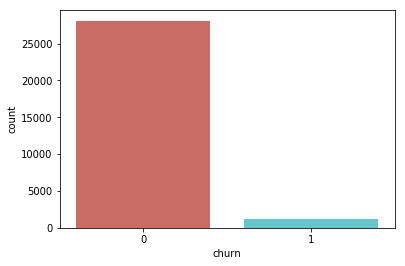

In [47]:
# plotting Churn to assess trend
sns.countplot(x='churn',data=final_data_hv2, palette='hls')
plt.show()

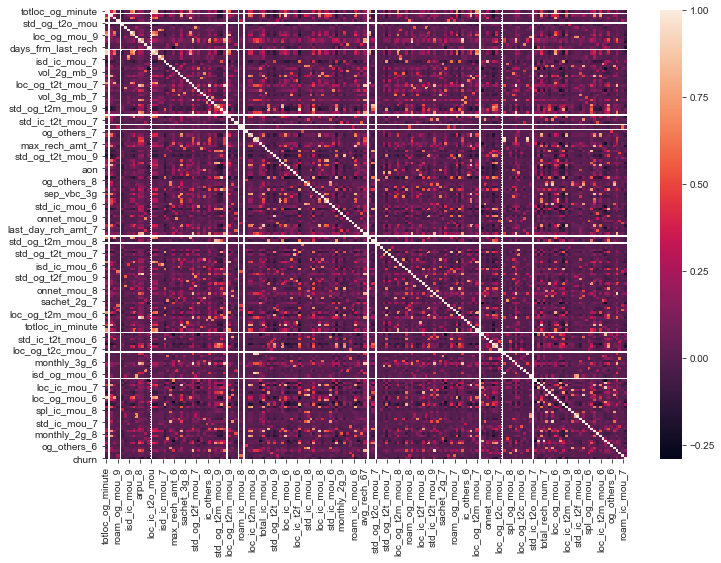

<Figure size 432x288 with 0 Axes>

In [48]:
# checking correlation among variables 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(final_data_hv2.corr(), ax=ax)
plt.show()
sns.despine()

In [108]:
# defining training and test datasets
# defining predictor and response/target variable
X = final_data_hv2.iloc[:, 0:184].values # predictors
y = final_data_hv2.iloc[:, 185].values # response

# Split into the Training set and Test set

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [109]:
# normalizing our dataset
# considering large dataset and assuming a Gaussian distibution among data point 
# we go for MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain = min_max_scaler.fit_transform(Xtrain)
Xtrain = pd.DataFrame(Xtrain) 
Xtrain.head()
print(Xtrain.shape)
#similarly normalising Xtest dataset
Xtest = min_max_scaler.fit_transform(Xtest)
Xtest = pd.DataFrame(Xtest) 
Xtest.head()
print(Xtest.shape)

(23435, 184)
(5859, 184)


In [110]:
# performing PCA (principal component analysis)
# principal component analysis, helps assess relationship among features and response, 
# which is quantified by finding a list of the 
# principal axes in the data, and using those axes to describe the dataset.


# Covariance Matrix and Eigendecomposition
# As, a covariance matrix is created based on the standardized data. 
# The covariance matrix indicates covariance among each feature in our dataset.


## for training set
mean_vec_train = np.mean(Xtrain, axis=0)
cov_mat_train = (Xtrain - mean_vec_train).T.dot((Xtrain- mean_vec_train)) / (Xtrain.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat_train)

## for test set
mean_vec_test = np.mean(Xtest, axis=0)
cov_mat_test = (Xtest - mean_vec_test).T.dot((Xtest- mean_vec_test)) / (Xtest.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat_test)




Covariance matrix 
              0    1             2             3             4    5    \
0    1.873143e-03  0.0  8.070861e-04  1.115141e-03 -5.718629e-05  0.0   
1    0.000000e+00  0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
2    8.070861e-04  0.0  2.545709e-03  3.745218e-04 -5.184704e-05  0.0   
3    1.115141e-03  0.0  3.745218e-04  1.370398e-03 -2.688064e-05  0.0   
4   -5.718629e-05  0.0 -5.184704e-05 -2.688064e-05  1.282790e-03  0.0   
5    0.000000e+00  0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
6   -8.996464e-05  0.0 -1.042529e-04 -4.451791e-05 -2.867031e-05  0.0   
7    3.120823e-05  0.0  6.189501e-05 -9.178642e-07  4.621442e-06  0.0   
8    1.843443e-05  0.0  1.726234e-04  1.871605e-07 -1.297552e-05  0.0   
9    6.374059e-04  0.0  1.643920e-04  5.513135e-04 -1.973725e-05  0.0   
10   1.176495e-03  0.0  4.653198e-04  6.236849e-04 -6.153842e-05  0.0   
11   2.198808e-05  0.0  1.190249e-04  5.056314e-06 -3.663362e-06  0.0   
12   2.450784e-04  0.0  1.209004

In [111]:
# performing eigen decomposition on covariance matrix yielded above to produce Eigenvectors and eigenvalues
#eigenvalues represents entire variance in the dataset.

# for training set
cov_mat_train = np.cov(Xtrain.T)
eig_vals_train, eig_vecs_train = np.linalg.eig(cov_mat_train)

print('Eigenvectors \n%s' %eig_vecs_train)
print('\nEigenvalues \n%s' %eig_vals_train)

# for test set
cov_mat_test = np.cov(Xtest.T)
eig_vals_test, eig_vecs_test = np.linalg.eig(cov_mat_test)

print('Eigenvectors \n%s' %eig_vecs_test)
print('\nEigenvalues \n%s' %eig_vals_test)


Eigenvectors 
[[ 0.04+0.j  0.07+0.j -0.16+0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.05+0.j  0.03+0.j -0.19+0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 ...
 [-0.  +0.j  0.01+0.j -0.02+0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [-0.01+0.j  0.05+0.j -0.04+0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [-0.  +0.j  0.01+0.j -0.  +0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]]

Eigenvalues 
[ 6.46e-02+0.00e+00j  3.93e-02+0.00e+00j  2.85e-02+0.00e+00j
  2.14e-02+0.00e+00j  1.54e-02+0.00e+00j  1.50e-02+0.00e+00j
  1.15e-02+0.00e+00j  1.06e-02+0.00e+00j  1.01e-02+0.00e+00j
  5.87e-03+0.00e+00j  5.30e-03+0.00e+00j  5.11e-03+0.00e+00j
  4.87e-03+0.00e+00j  4.65e-03+0.00e+00j  4.46e-03+0.00e+00j
  4.28e-03+0.00e+00j  3.97e-03+0.00e+00j  3.72e-03+0.00e+00j
  3.61e-03+0.00e+00j  3.17e-03+0.00e+00j  2.55e-03+0.00e+00j
  2.25e-03+0.00e+00j  2.08e-03+0.00e+00j  2.03e-03+0.00e+00j
  1.96e-03+0.00e+00j  1.85e-03+0.00e+00j  1.75e-03+0.00e+00j
  1.68e-03+0.00

The eigenvectors with the lowest eigenvalues describe the least amount of variation within the dataset. Therefore, these values can be dropped. First, lets order the eigenvalues in descending order:

In [112]:
#list is correctly sorted by decreasing eigenvalues
eig_pairs_train = [(np.abs(eig_vals_train[i]), eig_vecs_train[:,i]) for i in range(len(eig_vals_train))]
print('Eigenvalues for training set in descending order:')
for i in eig_pairs_train:
    print(i[0])
    
eig_pairs_test = [(np.abs(eig_vals_test[i]), eig_vecs_test[:,i]) for i in range(len(eig_vals_test))]
print('Eigenvalues for test set in descending order:')
for i in eig_pairs_test:
    print(i[0])   

Eigenvalues for training set in descending order:
0.06458031223053268
0.0392623057440412
0.028491753029930667
0.021431141774105617
0.015357567589563892
0.0149645785538283
0.0115214442723836
0.010592742554929549
0.010109319608161858
0.005871881460928732
0.005300698017520262
0.005106997821851563
0.004868246637535606
0.004653903653767076
0.004461037469656312
0.0042847141754903265
0.0039726332737711825
0.0037219833960393405
0.0036121686463247583
0.0031652021314531446
0.002548570583335723
0.0022477741863092195
0.002082133912864301
0.0020294583952757657
0.001964507639269149
0.0018548770612012487
0.0017542313520352887
0.0016798250088984766
0.0015888715786432626
0.001527658481293367
0.0014684347887203922
0.0014327738994659566
0.001353206870164952
0.0013383595191675986
0.0012455423022491327
0.0011559761019981553
0.001169023637839011
0.0012011801272576086
0.0011892115865055845
0.0010787227720267878
0.0010458613471090545
0.0009585786600434174
0.0009379533851218441
0.0009080529313138071
0.00087616

In [113]:
# to observe explained variance ratio of the first 50 principal components. (for training set)
pca_train = PCA(n_components=50)
pca_train.fit(Xtrain)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca_train.explained_variance_ratio_)
print(pca_train.singular_values_) 


[0.2  0.12 0.09 0.07 0.05 0.05 0.04 0.03 0.03 0.02 0.02 0.02 0.02 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
[38.9  30.33 25.84 22.41 18.97 18.73 16.43 15.76 15.39 11.73 11.15 10.94
 10.68 10.44 10.22 10.02  9.65  9.34  9.2   8.61  7.73  7.26  6.99  6.9
  6.78  6.59  6.41  6.27  6.1   5.98  5.87  5.79  5.63  5.6   5.4   5.31
  5.28  5.23  5.2   5.03  4.94  4.74  4.69  4.61  4.53  4.44  4.17  4.13
  4.08  3.92]


In [114]:
#Cumulative Variance 
var_train=np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100)
print(var_train)

[19.91 32.01 40.79 47.4  52.13 56.74 60.29 63.56 66.68 68.49 70.12 71.69
 73.19 74.62 76.   77.32 78.54 79.69 80.8  81.78 82.57 83.26 83.9  84.53
 85.14 85.71 86.25 86.77 87.26 87.73 88.18 88.62 89.04 89.45 89.83 90.2
 90.57 90.93 91.29 91.62 91.94 92.24 92.53 92.81 93.08 93.34 93.57 93.79
 94.01 94.21]


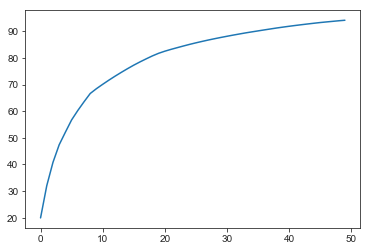

In [115]:
# plotting cummulative variance

plt.plot(var_train)

#### In our PCA analysis first 20 component explain variance of almost 81% of our dataset, we will select 20 componnents in our analysis

In [116]:
#Looking at above plot since we are taking 20 variables
pca_train = PCA(n_components=20)
pca_train.fit(Xtrain)
Xtrain_pca =pca_train.fit_transform(Xtrain)
print(Xtrain_pca)

[[ 8.37e-02 -8.25e-02  1.78e-01 ...  1.72e-03  2.31e-02  4.15e-02]
 [-4.52e-01  9.77e-02 -1.80e-02 ...  2.13e-04  6.03e-02  1.99e-02]
 [ 1.16e-01 -1.82e-01  1.03e-01 ... -1.12e-03 -1.24e-02 -2.08e-03]
 ...
 [ 4.78e-01  5.94e-01 -1.48e-01 ... -7.30e-04 -4.55e-02  8.65e-02]
 [ 2.32e-01  4.61e-01 -2.03e-01 ... -1.37e-02 -2.76e-02 -1.07e-01]
 [-7.90e-02 -1.38e-01  1.38e-01 ... -3.26e-01 -1.48e-02  1.94e-02]]


In [117]:
Xtrain_pca.shape

(23435, 20)

In [118]:
# Like above performing PCA for test set
# to observe explained variance ratio of the first 50 principal components.
pca_test = PCA(n_components=50)
pca_test.fit(Xtest)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca_test.explained_variance_ratio_)
print(pca_test.singular_values_) 

[0.16 0.12 0.08 0.05 0.05 0.05 0.04 0.04 0.04 0.03 0.02 0.02 0.02 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
[23.03 19.54 16.31 12.68 12.27 12.07 11.73 11.04 10.77  9.56  7.83  7.34
  7.1   6.83  6.45  6.34  6.14  6.1   5.94  5.67  5.52  5.34  5.16  4.99
  4.84  4.49  4.39  4.28  4.14  4.11  4.05  3.94  3.91  3.82  3.75  3.72
  3.67  3.57  3.55  3.31  3.28  3.19  3.17  3.16  3.07  3.05  3.    2.93
  2.92  2.84]


In [119]:
#Cumulative Variance test set
var_test=np.cumsum(np.round(pca_test.explained_variance_ratio_, decimals=4)*100)
print(var_test)

[16.48 28.34 36.6  41.6  46.28 50.8  55.08 58.87 62.47 65.31 67.21 68.88
 70.45 71.9  73.19 74.44 75.61 76.76 77.86 78.86 79.81 80.7  81.53 82.3
 83.03 83.66 84.26 84.83 85.36 85.88 86.39 86.87 87.34 87.79 88.23 88.66
 89.08 89.48 89.87 90.21 90.54 90.86 91.17 91.48 91.77 92.06 92.34 92.61
 92.88 93.13]


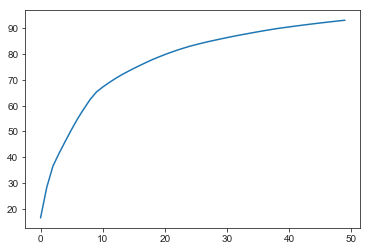

In [120]:
#plotting cummulative variance of test set

plt.plot(var_test)

In [121]:
#### Similar to training set we will take first 20 which explain 79% of our dataset variance

In [122]:
#Looking at above plot since we are taking 20 variables
pca_test = PCA(n_components=20)
pca_test.fit(Xtrain)
Xtest_pca =pca_train.fit_transform(Xtest)
print(Xtest_pca)

[[ 0.65  0.05  0.34 ... -0.15  0.25  0.09]
 [ 0.54  0.14  0.19 ... -0.15 -0.22  0.02]
 [-0.01  0.03 -0.32 ... -0.13  0.06  0.02]
 ...
 [ 0.99  0.56 -0.12 ...  0.19  0.12  0.03]
 [ 0.01  0.01 -0.19 ... -0.08 -0.01 -0.04]
 [-0.28 -0.19 -0.17 ...  0.07  0.01 -0.01]]


In [123]:
Xtest_pca.shape

(5859, 20)

## using Logistics Regression

In [124]:
# conducting logistic regression on our PCA reduced dataset

logreg = LogisticRegression(random_state = 0)
logreg.fit(Xtrain_pca, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
# predicting the response /label for test data
ytest_pred = logreg.predict(Xtest_pca)
print(ytest_pred)

[0 0 0 ... 0 0 0]


In [126]:
# Measuing model performance
# Model Accurace
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xtest_pca, ytest)))

# Measure MSE error.  
score_MSE = mean_squared_error(ytest_pred,ytest)
print("Final score (MSE): {}".format(score_MSE))

# Measure RMSE error.  RMSE is common for regression.
score_RMSE = np.sqrt(score_MSE)
print("Final score (RMSE): {}".format(score_RMSE))

Accuracy of logistic regression classifier on test set: 0.93
Final score (MSE): 0.0706605222734255
Final score (RMSE): 0.26582047000452297


In [128]:
#confusion matrix

conf_Mat = pd.DataFrame(confusion_matrix(ytest,ytest_pred))
print('Confusion Matrix without Normalization')
print(conf_Mat)
print(ytest.shape)
print(ytest_pred.shape)

Confusion Matrix without Normalization
      0    1
0  5441  193
1   221    4
(5859,)
(5859,)


In [129]:
# calculating Precision and Recall

print(classification_report(ytest, ytest_pred))


             precision    recall  f1-score   support

          0       0.96      0.97      0.96      5634
          1       0.02      0.02      0.02       225

avg / total       0.92      0.93      0.93      5859



0.49176073837415685


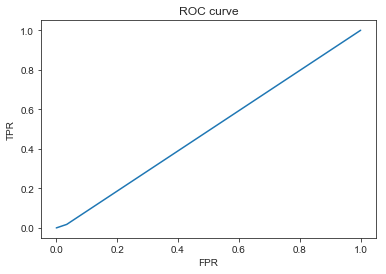

In [131]:
# plotting ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ytest_pred)

print (auc(false_positive_rate, true_positive_rate))

plt.clf()
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()